In [28]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from src.utils import load_dataset, dataset_augmentation
from src.main import feature_extractor, feature_extractor_fusion, train
from src.visualization import visualize_features


In [29]:
np.random.seed(42)

dataset, labels = load_dataset("./dataset/train")
img_train, img_test, label_train, label_test = train_test_split(dataset, labels, test_size=0.2, random_state=42, stratify=labels)
color_feature_extractor, shape_feature_extractor = feature_extractor(img_train)

285 (282, 153, 3)


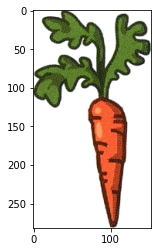

In [87]:
print(len(dataset), dataset[0].shape)
plt.imshow(dataset[0])

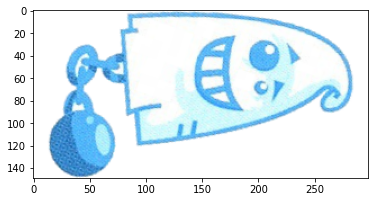

In [101]:
def random_rotation(img):
    # pick a random degree of rotation between 50% on the left and 50% on the right
    random_degree = np.random.uniform(-180, 180)

    # Rotate image without cutting sides off    
    height, width = img.shape[:2]
    image_center = (width / 2, height / 2)

    rotation_mat = cv2.getRotationMatrix2D(image_center, random_degree, 1)

    radians = np.math.radians(random_degree)
    sin = np.math.sin(radians)
    cos = np.math.cos(radians)
    bound_w = int((height * abs(sin)) + (width * abs(cos)))
    bound_h = int((height * abs(cos)) + (width * abs(sin)))

    rotation_mat[0, 2] += ((bound_w / 2) - image_center[0])
    rotation_mat[1, 2] += ((bound_h / 2) - image_center[1])

    rotated_img = cv2.warpAffine(img, rotation_mat, (bound_w, bound_h), borderMode = cv2.BORDER_CONSTANT, borderValue=[255, 255,255])

    (h,w,_) = rotated_img.shape
    cropped_rotated_img = []
    for i in range(h):
        if (rotated_img[i, :w, :] != 255).any():
            cropped_rotated_img.append(rotated_img[i, :w, :])
    return cropped_rotated_img

plt.imshow(random_rotation(dataset[120]))

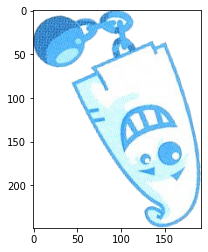

In [102]:
plt.imshow(dataset[120])

In [4]:
import skimage as sk
from skimage import transform
from skimage import util
from skimage import io
import cv2

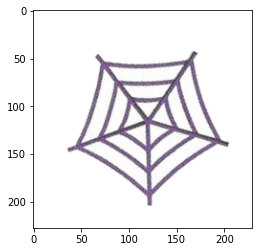

In [84]:
def rotate_image(mat, angle):
    height, width = mat.shape[:2]
    image_center = (width / 2, height / 2)

    rotation_mat = cv2.getRotationMatrix2D(image_center, angle, 1)

    radians = np.math.radians(angle)
    sin = np.math.sin(radians)
    cos = np.math.cos(radians)
    bound_w = int((height * abs(sin)) + (width * abs(cos)))
    bound_h = int((height * abs(cos)) + (width * abs(sin)))

    rotation_mat[0, 2] += ((bound_w / 2) - image_center[0])
    rotation_mat[1, 2] += ((bound_h / 2) - image_center[1])

    return cv2.warpAffine(mat, rotation_mat, (bound_w, bound_h), borderMode = cv2.BORDER_CONSTANT, borderValue=[255, 255,255])

new_img = rotate_image(dataset[1], 30)
plt.imshow(new_img)

(228, 229, 3)
(164, 229, 3)


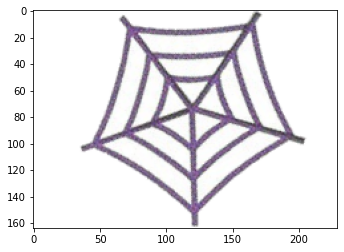

In [86]:
(h,w,c) = new_img.shape
print((h,w,c))
final_img = []
for i in range(h):
    if (new_img[i, :w, :] != 255).any():
        final_img.append(new_img[i, :w, :])
        
print(np.array(final_img).shape)
plt.imshow(np.array(final_img))

In [12]:
print(len(dataset))
dataset_aug = dataset_augmentation(dataset)
print(len(dataset_aug))

285
855


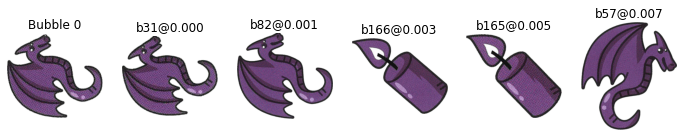

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0xfffedf06cd30>
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.10/site-packages/matplotlib/transforms.py", line 222, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id(self): pop(k))
KeyboardInterrupt: 


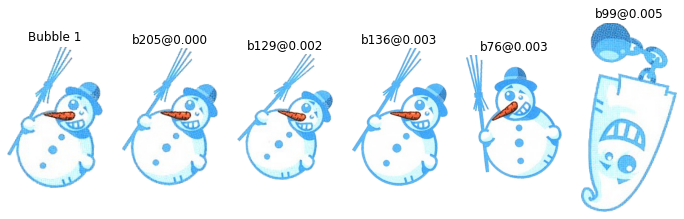

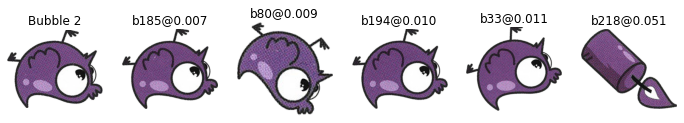

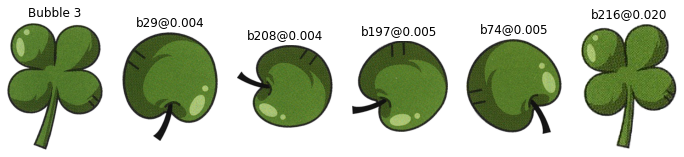

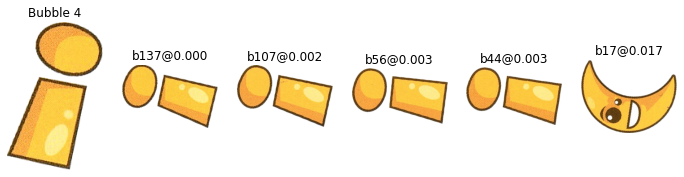

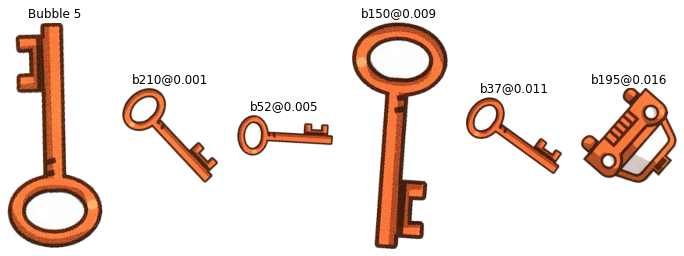

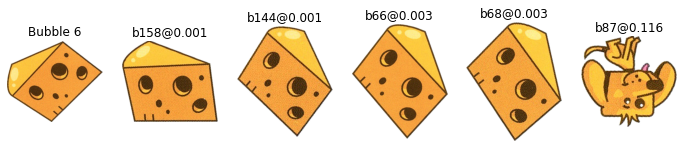

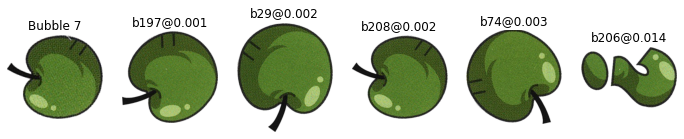

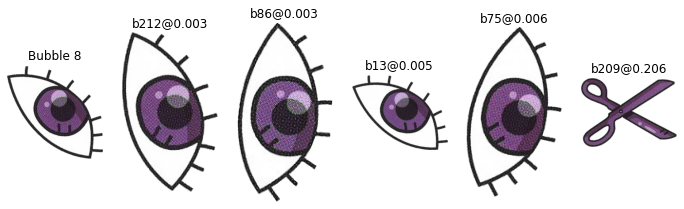

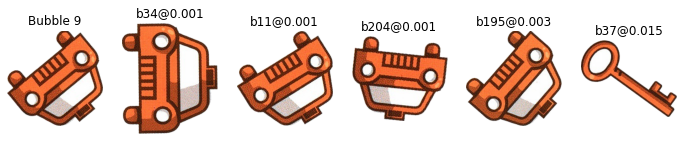

In [13]:
visualize_features(color_feature_extractor, img_train, img_test)

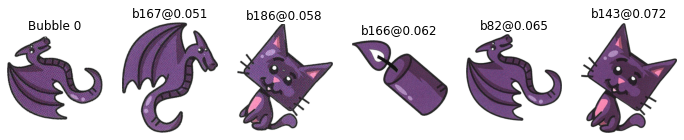

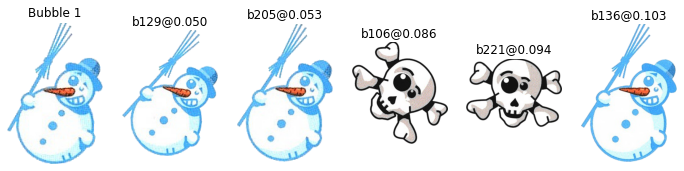

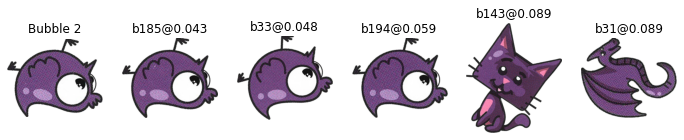

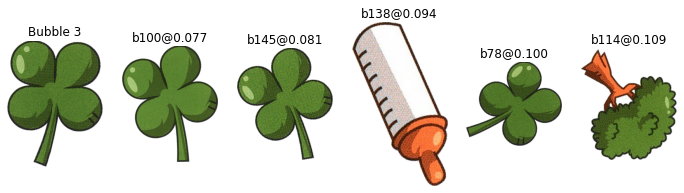

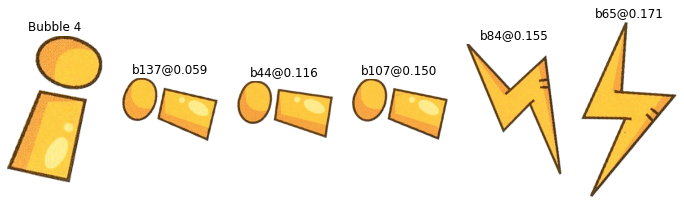

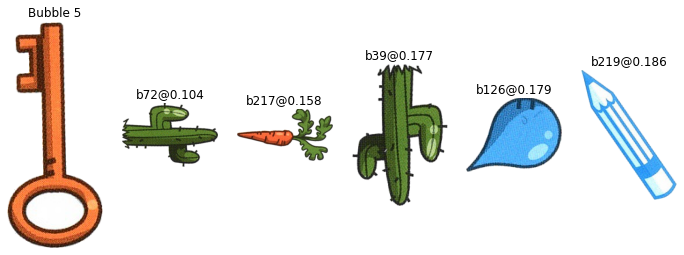

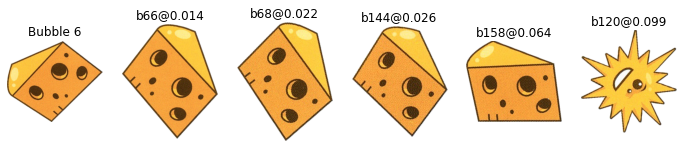

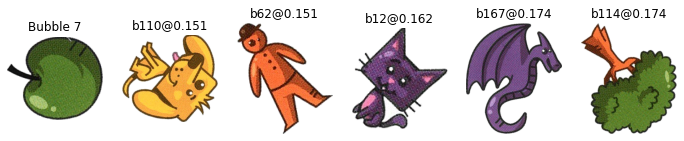

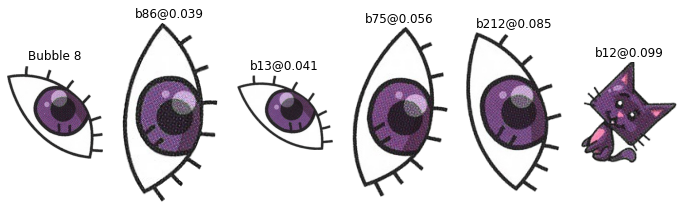

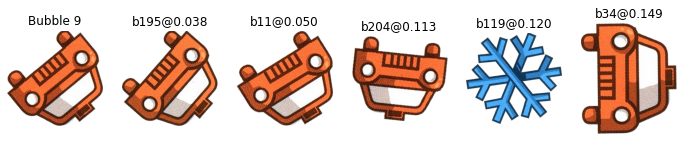

In [ ]:
visualize_features(shape_feature_extractor, img_train, img_test)

[0.01171388 0.04511091 0.         0.62449115 0.         0.
 0.19307136 0.         0.         0.         0.         0.01038465
 0.         0.         0.         0.         0.         0.00648002
 0.03248318 0.         0.06355404 0.         0.01271081 0.        ] [0.065 0.005 0.    0.005 0.005 0.055 0.    0.015 0.01  0.    0.    0.
 0.    0.    0.    0.    0.    0.005 0.    0.005 0.005 0.    0.    0.   ]
[0.21439901 0.01303358 0.         0.06758155 0.         0.
 0.00593063 0.         0.         0.         0.         0.14681746
 0.         0.         0.         0.         0.         0.36266464
 0.16295428 0.         0.01586098 0.         0.01075788 0.        ] [0.04  0.05  0.02  0.05  0.07  0.08  0.08  0.03  0.055 0.055 0.035 0.02
 0.075 0.07  0.08  0.05  0.025 0.075 0.005 0.115 0.03  0.08  0.07  0.015]


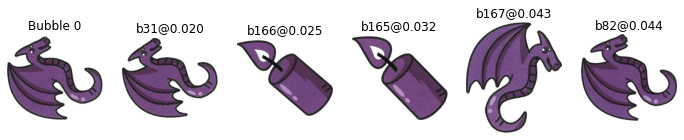

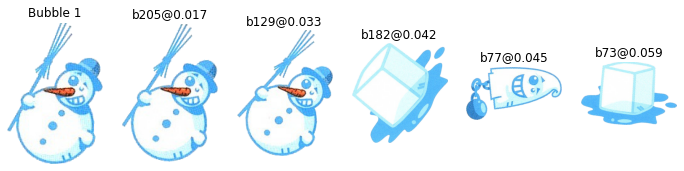

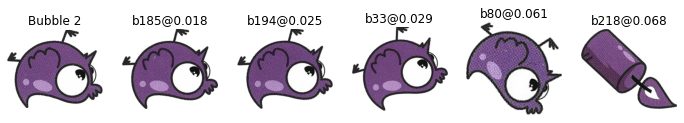

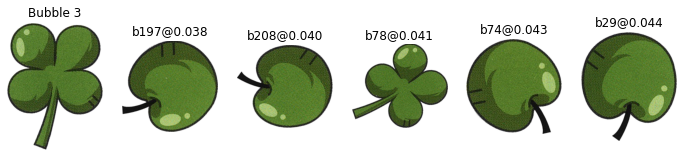

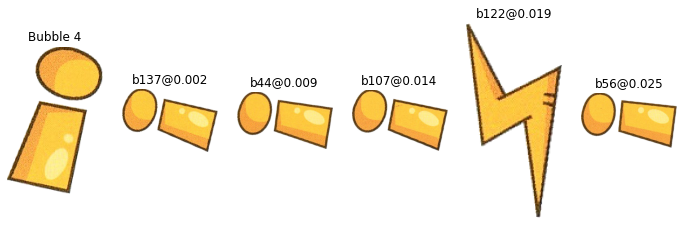

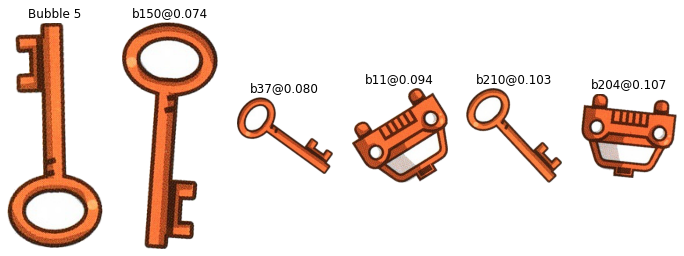

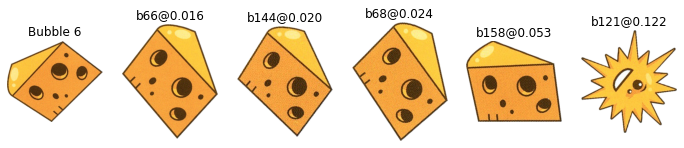

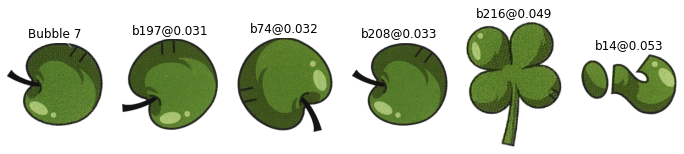

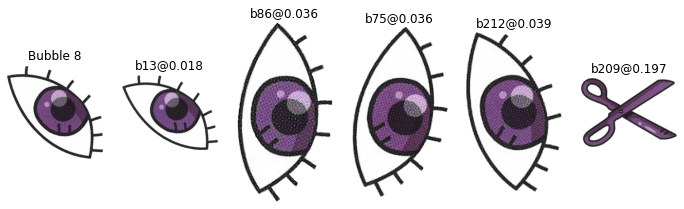

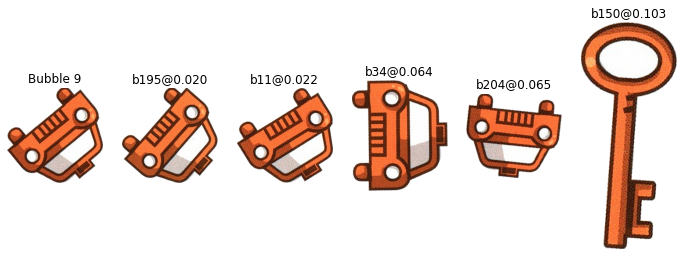

In [ ]:
fused_feature_extractor = feature_extractor_fusion(color_feature_extractor, shape_feature_extractor)
visualize_features(fused_feature_extractor, img_train, img_test)

[0.01171388 0.04511091 0.         0.62449115 0.         0.
 0.19307136 0.         0.         0.         0.         0.01038465
 0.         0.         0.         0.         0.         0.00648002
 0.03248318 0.         0.06355404 0.         0.01271081 0.        ] [0.13541667 0.01041667 0.         0.01041667 0.01041667 0.11458333
 0.         0.03125    0.02083333 0.         0.         0.
 0.         0.         0.         0.         0.         0.01041667
 0.         0.01041667 0.01041667 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
[0.21439901 0.01303358 0.         0.06758155 0.         0.
 0.00593063 0.         0.         0.         0.         0.14681746
 0.         0.         0.         0.         0.         0.36266464
 0.16295428 0.         0.01586098 0.         0.01

/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


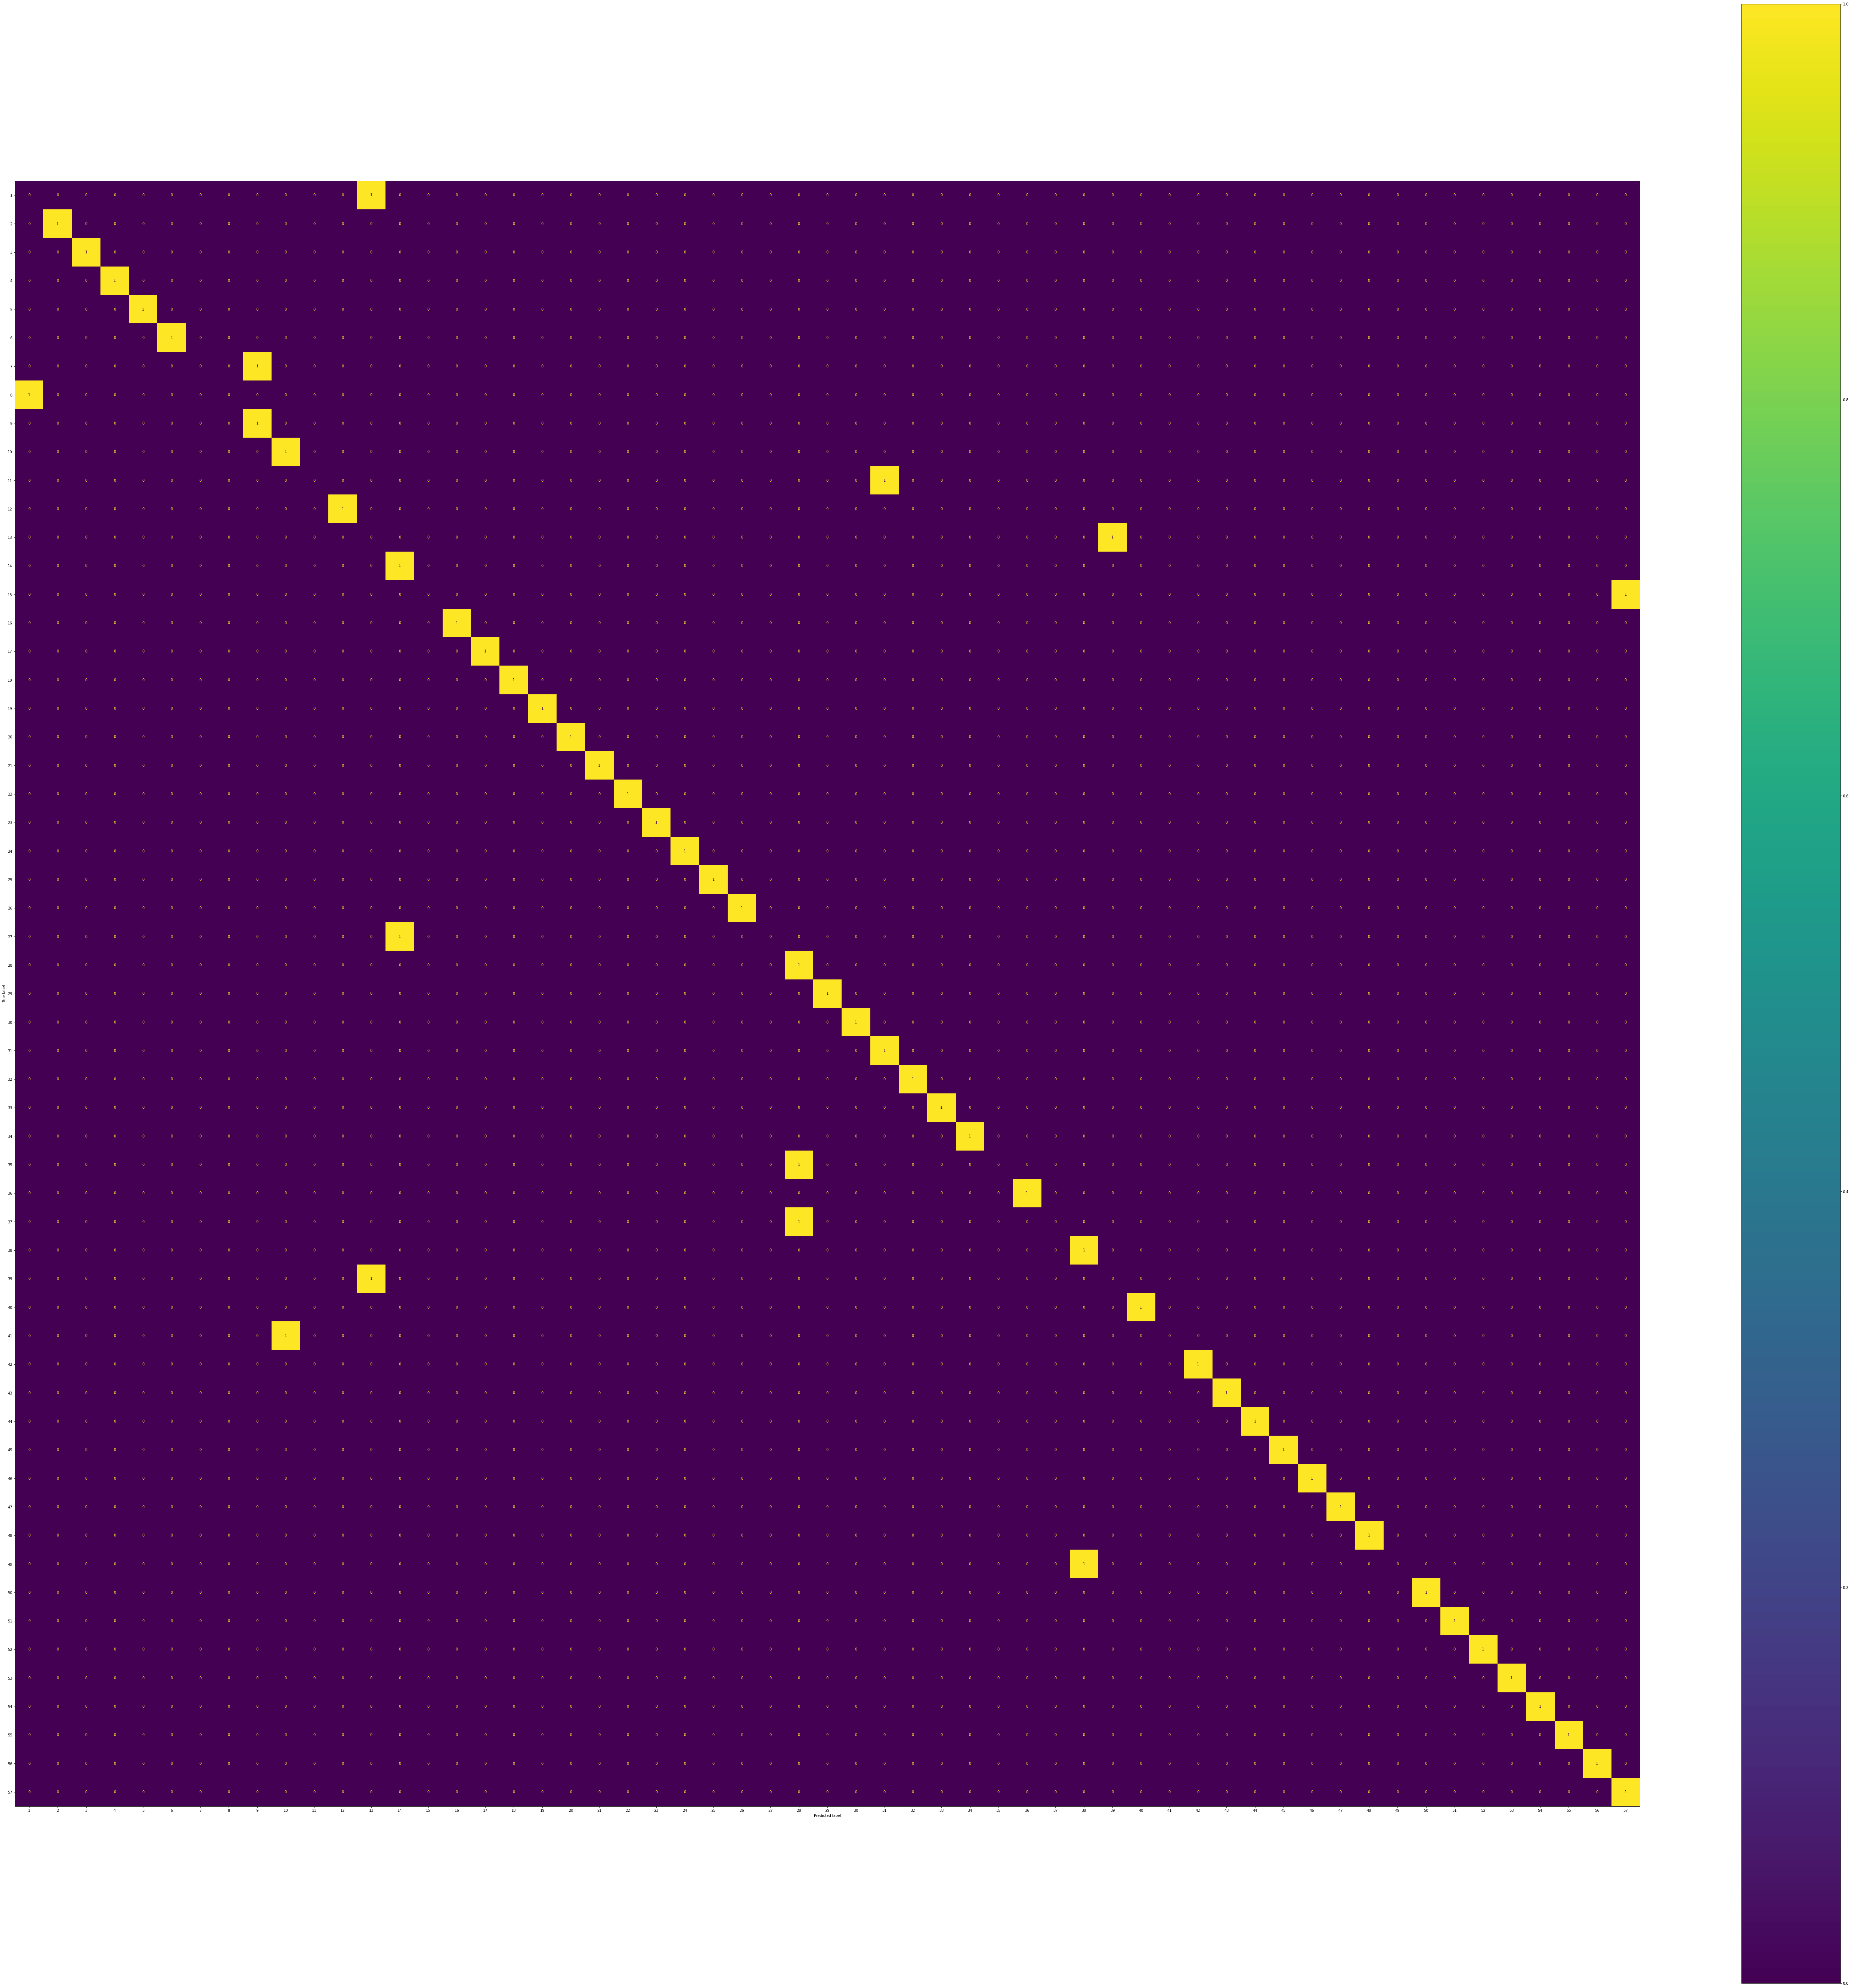

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

clf = KNeighborsClassifier(n_neighbors=5)

train(clf, fused_feature_extractor(img_train), label_train)

fig = plt.figure(figsize=(100, 100))
ax = fig.add_subplot(111)

plot_confusion_matrix(clf, fused_feature_extractor(img_test), label_test, ax=ax)



In [68]:
import cv2
img = np.array(img_train)[np.array(label_train) == 10][0]

img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# plt.imshow(img, cmap='gray')
# plt.show()

moments = cv2.HuMoments(cv2.moments(img)).flatten()
print(moments)

{'m00': 3041645.0, 'm10': 250050210.0, 'm01': 165136151.0, 'm20': 28447730988.0, 'm11': 13141971512.0, 'm02': 12768259279.0, 'm30': 3707513405388.0, 'm21': 1481041577082.0, 'm12': 994757963356.0, 'm03': 1105695792863.0, 'mu20': 7891384826.286813, 'mu11': -433685488.1238522, 'mu02': 3802732938.123664, 'mu30': 71373759380.47096, 'mu21': 7870807553.306025, 'mu12': -7815186877.42329, 'mu03': -428871149.21089643, 'nu20': 0.0008529747452717623, 'nu11': -4.687678739582708e-05, 'nu02': 0.00041103497429599085, 'nu30': 4.423512516114595e-06, 'nu21': 4.878069479061922e-07, 'nu12': -4.843597600593188e-07, 'nu03': -2.6580033233529423e-08}


/tmp/ipykernel_5324/692004544.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  img = np.array(img_train)[np.array(label_train) == 10][0]
